In [9]:
from numpy.random import seed
seed(101)
#from tensorflow import set_random_seed
import tensorflow
tensorflow.random.set_seed(1)

import pandas as pd
import numpy as np


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

#create the ImageDataGenerator object and rescale the images
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

#convert them into a dataset
trainDataset = trainGenerator.flow_from_dataframe(
dataframe=train_df,
class_mode="binary",
x_col="image",
y_col="label",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
target_size=(IMG_HEIGHT,IMG_WIDTH) #set the height and width of the images
)

valDataset = valGenerator.flow_from_dataframe(
dataframe=val_df,
class_mode='binary',
x_col="image",
y_col="label",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
target_size=(IMG_HEIGHT,IMG_WIDTH)

testDataset = testGenerator.flow_from_dataframe(
dataframe=test_df,
class_mode='binary',
x_col="image",
y_col="label",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
target_size=(IMG_HEIGHT,IMG_WIDTH)

SyntaxError: ignored

## **CNN**

In [19]:
from google.colab import drive
import pandas as pd
import os
import os.path
import numpy as np
from tqdm import tqdm
from PIL import Image
print(os.getcwd())

os.chdir("/content/sample_data")
path = "/content" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)
# Import data from drive
drive.mount('drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/fold1/test/40X")
#!ls

train_images = []
train_labels = []
test_images = []
test_labels = []
input_arr = []


for index, img_path in enumerate(tqdm(os.listdir('/content/drive/My Drive/Colab Notebooks/fold1/train/40X/'))):
  img = Image.open('/content/drive/My Drive/Colab Notebooks/fold1/train/40X/' + img_path)
  img = img.resize((100, 100))
  img = np.array(img)
  img = img / 255.0
  train_images.append(img)
  train_labels.append(0 if '_M_' in img_path else 1)


train_images = np.array(train_images)
train_labels_simple = np.array(train_labels)
train_labels = np.array(train_labels)
train_labels = np.reshape(np.array(train_labels), (-1, 1))

for index, img_path in enumerate(tqdm(os.listdir('/content/drive/My Drive/Colab Notebooks/fold1/test/40X/'))):
  img = Image.open('/content/drive/My Drive/Colab Notebooks/fold1/test/40X/' + img_path)
  img = img.resize((100, 100))
  img = np.array(img)
  img = img / 255.0
  test_images.append(img)
  test_labels.append(0 if '_M_' in img_path else 1)

test_images = np.array(test_images)
test_labels_simple = np.array(test_labels)
test_labels = np.array(test_labels)
test_labels = np.reshape(np.array(test_labels), (-1, 1))

/content/drive/MyDrive/Colab Notebooks/fold1/test/40X
Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


100%|██████████| 745/745 [00:18<00:00, 41.30it/s]


In [20]:
#print(test_labels)
test_labels2=["Malignant" if i==0 else "Benign" for i in test_labels ]
print(test_labels2)

['Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',

In [21]:
# print the first 10 images
fig = plt.figure(figsize=(25, 4))
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    plt.imshow(test_images[i])
    label = test_labels2[i]
    #df_train.loc[df_train['id'] == img_train[i].split('.')[0], 'label'].values[0]
    ax.set_title(f'#{i+1} - Label: {label}')

In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
test_labels3 = enc.fit_transform(test_labels).toarray()
print(np.shape(test_labels3))

enc = OneHotEncoder()
train_labels = enc.fit_transform(train_labels).toarray()
print(np.shape(train_labels))


#test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
#test_ds = test_ds.shuffle(1000).batch(32)
#test_ds = test_ds.batch(32)
#test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

(745, 2)
(1250, 2)


In [23]:
from joblib.externals.cloudpickle import v
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Dense(5, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(2, activation='softmax'))

cnn.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

cnn.summary()
history_cnn = cnn.fit(train_images, train_labels, epochs = 10, batch_size = 64, verbose = 'auto')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 49, 49, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 64)        57664     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 10, 10, 64)       

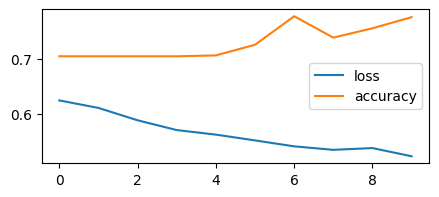

In [42]:
pd.DataFrame(history_cnn.history).plot(figsize=(5,2))
plt.show()


In [25]:
y_pred_proba = cnn.predict(test_images)
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(test_labels, y_pred_proba[:,1])
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


24/24 [==============================] - 9s 359ms/step


[[443  47]
 [104 151]]


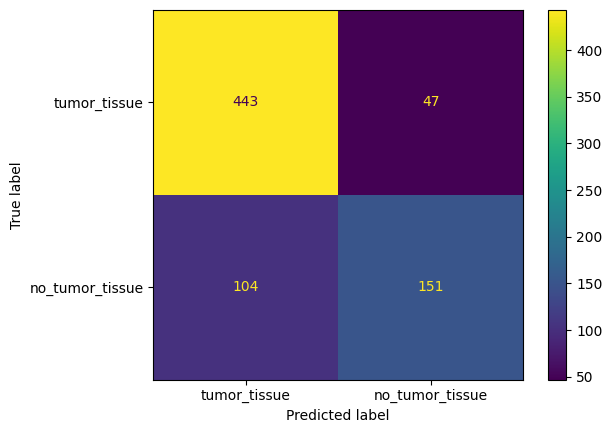

In [26]:
from sklearn.metrics import roc_auc_score
cm = confusion_matrix(test_labels, y_pred_proba.argmax(axis=1))
print(cm)
cm_plot_labels = ['tumor_tissue', 'no_tumor_tissue']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cm_plot_labels)
disp.plot()
plt.show()

## **Shallow Neural Network**

In [74]:
# Create a shallow neural network model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Flatten(input_shape=(100, 100, 3)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 10
model.fit(train_images, train_labels[:,1],  epochs=10)

Epoch 1/10
40/40 [==============================] - 1s 7ms/step - loss: 2.4860 - accuracy: 0.5992
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 0.7901 - accuracy: 0.7352
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6672 - accuracy: 0.7144
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 0.6019 - accuracy: 0.7168
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.5763 - accuracy: 0.7400
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 0.6660 - accuracy: 0.6888
Epoch 7/10
40/40 [==============================] - 0s 7ms/step - loss: 0.5782 - accuracy: 0.7192
Epoch 8/10
40/40 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.7264
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.9611 - accuracy: 0.6848
Epoch 10/10
40/40 [==============================] - 0s 7ms/step - loss: 0.5724 - accuracy: 0.7448


Epoch 1/10
20/20 [==============================] - 0s 9ms/step - loss: 0.9304 - accuracy: 0.6384
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6237 - accuracy: 0.7120
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.5221 - accuracy: 0.7568
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6406 - accuracy: 0.6920
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5430 - accuracy: 0.7512
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5036 - accuracy: 0.7624
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5936 - accuracy: 0.7160
Epoch 8/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4837 - accuracy: 0.7648
Epoch 9/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5800 - accuracy: 0.7216
Epoch 10/10
20/20 [==============================] - 0s 9ms/step - loss: 0.5605 - accuracy: 0.7464


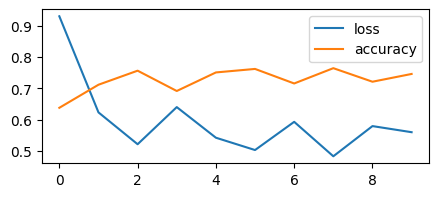

In [75]:
history_model = model.fit(train_images, train_labels[:,1], epochs = 10, batch_size = 64, verbose = 'auto')
pd.DataFrame(history_model.history).plot(figsize=(5,2))
plt.show()


24/24 [==============================] - 0s 3ms/step
[[0.43529275]
 [0.5299903 ]
 [0.3888131 ]
 [0.364653  ]
 [0.65559846]
 [0.38789287]
 [0.42946544]
 [0.55101866]
 [0.69698185]
 [0.38487923]
 [0.51956713]
 [0.73742175]
 [0.9000849 ]
 [0.91605294]
 [0.83838075]
 [0.85527825]
 [0.88967746]
 [0.62225586]
 [0.26116502]
 [0.8726559 ]
 [0.8148784 ]
 [0.93471175]
 [0.32301736]
 [0.3964277 ]
 [0.70734656]
 [0.6640713 ]
 [0.4829026 ]
 [0.6805925 ]
 [0.68682057]
 [0.6559263 ]
 [0.32065696]
 [0.60080475]
 [0.52888453]
 [0.7627113 ]
 [0.5506221 ]
 [0.27701417]
 [0.27551854]
 [0.47967708]
 [0.34330007]
 [0.77670944]
 [0.41111985]
 [0.86366457]
 [0.832371  ]
 [0.78094083]
 [0.90214914]
 [0.8964328 ]
 [0.89528155]
 [0.9364017 ]
 [0.8792926 ]
 [0.90113777]
 [0.8292321 ]
 [0.8796936 ]
 [0.90905493]
 [0.8459329 ]
 [0.8435147 ]
 [0.82088625]
 [0.8411682 ]
 [0.7919191 ]
 [0.78082895]
 [0.7942565 ]
 [0.79605144]
 [0.804912  ]
 [0.83881176]
 [0.7736132 ]
 [0.86040694]
 [0.8537974 ]
 [0.86876225]
 [0.85392

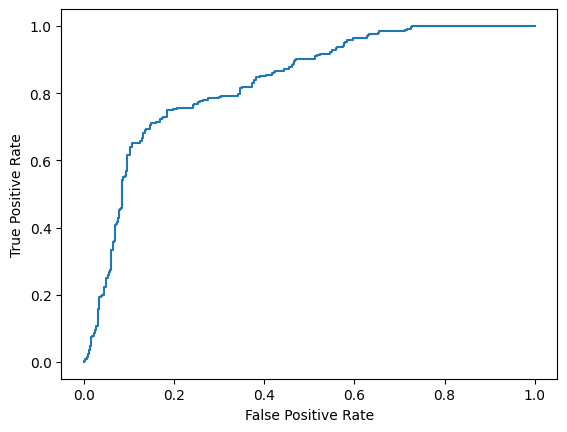

In [76]:
y_pred_proba = model.predict(test_images)
print(y_pred_proba)
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(test_labels, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[281 209]
 [ 34 221]]


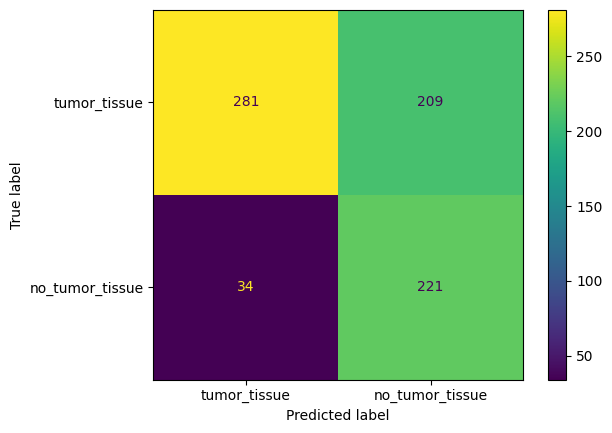

In [77]:
from sklearn.metrics import roc_auc_score
cm = confusion_matrix(test_labels, y_pred_proba>=0.5)
print(cm)
cm_plot_labels = ['tumor_tissue', 'no_tumor_tissue']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cm_plot_labels)
disp.plot()
plt.show()

In [78]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
import os
print(os.getcwd())
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks")
!jupyter nbconvert --to pdf 'exc2_ver2.ipynb'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu